# Step #1 Load the Data

In [30]:
import calendar
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.colors as mcolors
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

from sklearn.model_selection import train_test_split as train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance


# Load train data
filepath = "data/classification-online-shopping/"
df_shopping_base = pd.read_csv(filepath + 'online_shoppers_intention.csv') 
df_shopping_base

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Step #2 Exploring and Cleaning the data

In [31]:
# Replacing visitor_type to int
print(df_shopping_base['VisitorType'].unique())
df_shop = df_shopping_base.replace({'VisitorType' : { 'New_Visitor' : 0, 'Returning_Visitor' : 1, 'Other' : 2 }})

# Coverting month column to numeric numeric values
monthlist = df_shop['Month'].replace('June', 'Jun')
mlist = []
m = np.array(monthlist)
for mi in m:
    a = list(calendar.month_abbr).index(mi)
    mlist.append(a)
df_shop['Month'] =  mlist

# Delete records with NAs
df_shop.dropna(inplace=True)

df_shop.head()

['Returning_Visitor' 'New_Visitor' 'Other']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,True,False


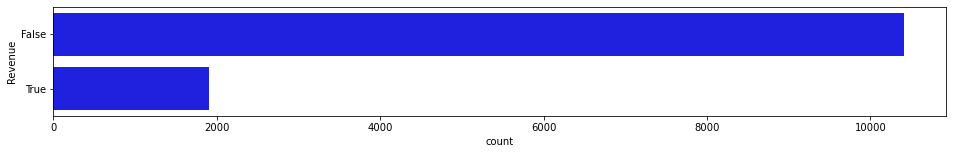

In [4]:
# Checking the balance of prediction labels

plt.figure(figsize=(16,2))
fig = sns.countplot(y="Revenue", data=df_shop, color='b')
plt.show()

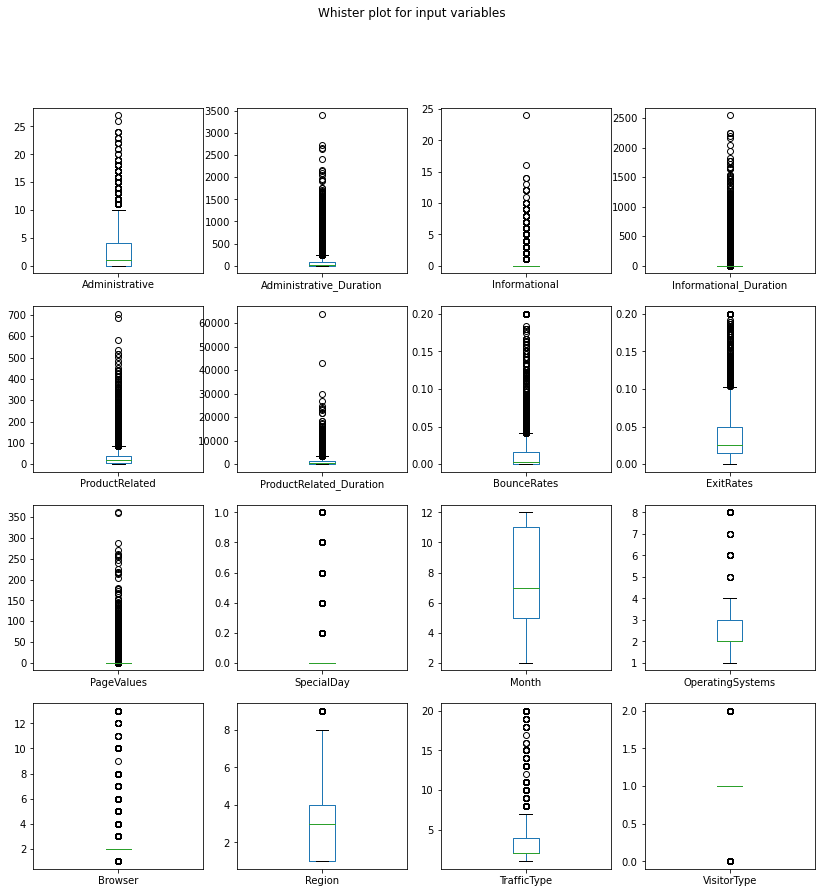

In [5]:
# Whiskerplots
c= 'black'
df_shop.drop('Revenue', axis=1).plot(kind='box', 
                                subplots=True, layout=(4,4), 
                                sharex=False, sharey=False, 
                                figsize=(14,14), 
                                title='Whister plot for input variables')
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


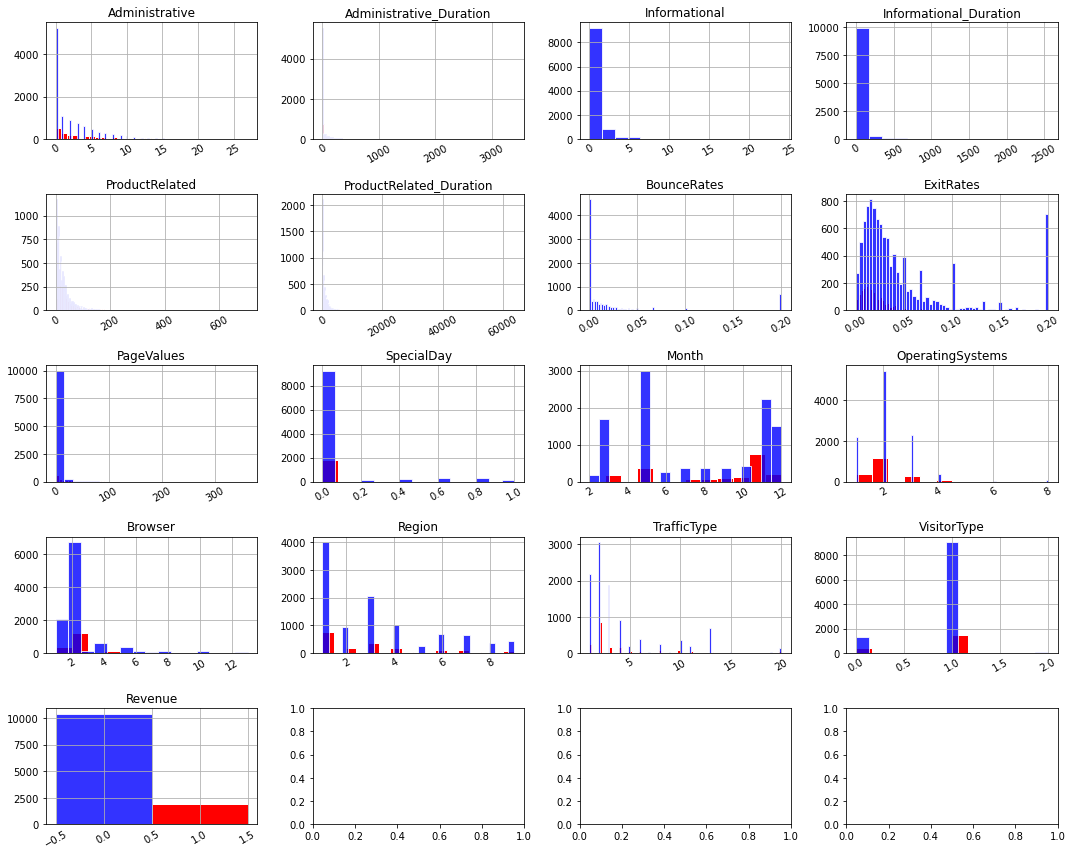

In [45]:
# Create histograms for feature columns separated by prediction label value
class_columnname = 'Revenue'

df_plot = df_shop.copy().drop(['Weekend'], axis=1)
register_matplotlib_converters()

list_length = df_plot.shape[1]
ncols = 4
nrows = int(round(list_length / ncols, 0))
if ncols * nrows < list_length:
    nrows += 1

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        featurename = df_plot.columns[i]
        ax = plt.subplot(nrows, ncols, i+1)
        y0 = df_plot[df_plot[class_columnname]==True][featurename]
        ax.hist(y0, color='red', label= featurename + f'-{class_columnname}', bins='auto', edgecolor='w')
        y1 = df_plot[df_plot[class_columnname]==False][featurename]
        ax.hist(y1, color='blue', alpha=0.8, label=featurename + f'-No{class_columnname}', bins='auto', edgecolor='w')
        ax.set_title(featurename)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        plt.grid()   
fig.tight_layout()
plt.show()

<AxesSubplot:>

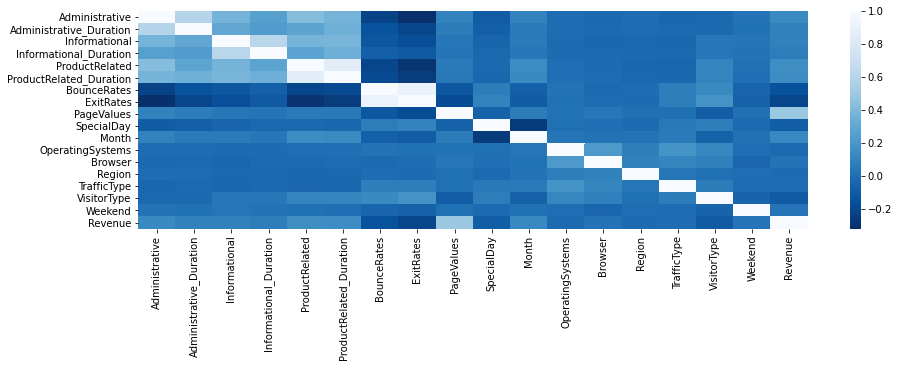

In [6]:
# Feature correlation
plt.figure(figsize=(15,4))
f_cor = df_shop.corr()
sns.heatmap(f_cor, cmap="Blues_r")

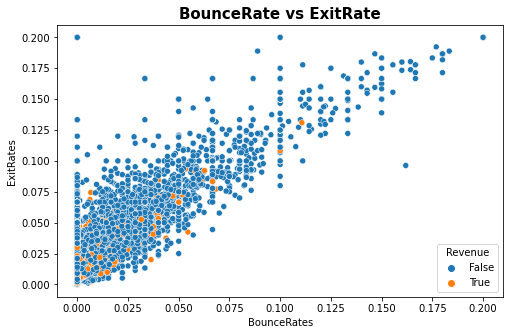

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df_shop,hue='Revenue')
plt.title('BounceRate vs ExitRate', fontweight='bold', fontsize=15)
plt.show()

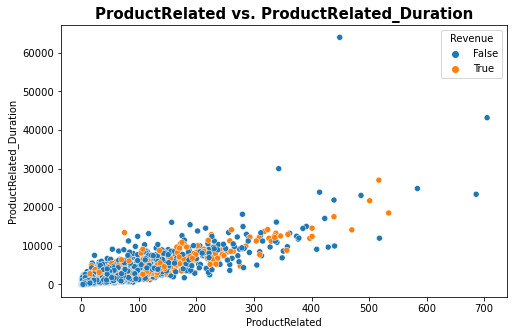

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'ProductRelated',y='ProductRelated_Duration',data=df_shop,hue='Revenue')
plt.title('ProductRelated vs. ProductRelated_Duration', fontweight='bold', fontsize=15)
plt.show()

# Step #3 Data Preprocessing

In [9]:
# Separate labels from training data
features = ['Administrative', 'Administrative_Duration', 'Informational', 
            'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 
            'Month', 'Region', 'TrafficType', 'VisitorType']
X = df_shop[features] #Training data
y = df_shop['Revenue'] #Prediction label

# Split the data into x_train and y_train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Scale the numeric values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step #4 Train a Logistic Regression Model

In [10]:
# Training a classification model using logistic regression 
model_lgr = LogisticRegression(solver='lbfgs')
score = model_lgr.fit(X_train, y_train).decision_function(X_test)

# Step #5 Evaluate Model Performance

Text(0.5, 15.0, 'Predicted label')

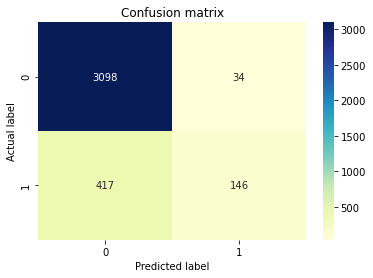

In [11]:
# Predict on the test set
y_pred = model_lgr.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix as heatmap
class_names=[False, True] # name  of classes
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.88
Precision: 0.81
Recall: 0.26
f1_score: 0.39


# Step #6 Permutation Feature Importance

Text(0.5, 1.0, 'Logistic Regression Feature Importances')

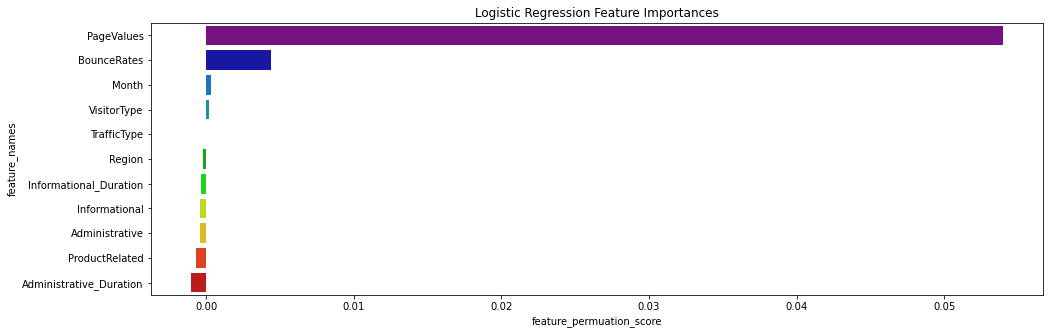

In [13]:
# Load the data
r = permutation_importance(model_lgr, X_test, y_test, n_repeats=30, random_state=0)

# Plot the barchart
data_im = pd.DataFrame(r.importances_mean, columns=['feature_permuation_score'])
data_im['feature_names'] = X.columns
data_im = data_im.sort_values('feature_permuation_score', ascending=False)

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=data_im['feature_names'], x="feature_permuation_score", data=data_im, palette='nipy_spectral')
ax.set_title("Logistic Regression Feature Importances")